# Lab 8 - Naive Bayes
- **Author:** Qutub Khan Vajihi
- **Date:** 17 March 2021
- **Course:** INFO 251: Applied Machine Learning

### Topics:
1. Naive Bayes - Bernoulli vs Multinomial
2. tf-idf
3. NB Complete Example

### References:
* https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/
* https://scikit-learn.org/stable/modules/feature_extraction.html
* https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

In [2]:
import os
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix 
import IPython

# Naive Bayes

Naive Bayes Classifiers have strict assumptions about independence in features, but it still has advantages - 
* They are extremely fast for both training and prediction
* They provide straightforward probabilistic prediction
* They are often very easily interpretable
* They have very few (if any) tunable parameters

Let's go over the functions that sklearn provides for Bernoulli and Multinomial NB. There is one important parameter of interest to us - 

* alpha ==> This Additive (Laplacian/Lidston) smoothing parameter. Default 1, 0 for no smoothing.

### Bernoulli NB

In [3]:
# Bernoulli NB 
X = np.random.randint(2, size=(6, 100))# 6 inputs rows, with 100 features each
Y = np.array([1, 0, 1, 1, 1, 0])# labels for each input row
df = pd.DataFrame(X)
df['Target'] = Y
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Target
0,1,0,0,0,0,0,1,1,0,1,...,1,1,1,1,0,1,0,1,1,1
1,0,0,1,1,0,1,0,0,0,1,...,1,1,1,0,0,0,1,0,1,0
2,1,1,1,1,0,1,1,1,1,0,...,0,0,1,1,0,1,0,0,1,1
3,1,1,0,1,1,1,1,1,0,1,...,1,0,1,0,1,0,0,1,0,1
4,0,0,0,0,1,1,1,0,1,0,...,0,1,0,1,0,1,0,1,0,1
5,0,0,0,1,1,0,0,0,1,0,...,1,0,1,1,1,1,1,1,1,0


In [4]:
clf = BernoulliNB(alpha=1) 
clf.fit(X, Y)
print(clf.predict(X[2:3]))

[1]


In [5]:
print(clf.classes_)
print(clf.predict_proba(X[2:3]))

[0 1]
[[2.18873e-10 1.00000e+00]]


In [6]:
print(clf.get_params())

{'alpha': 1, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}


### Multinomial NB

In [7]:
# Multinomial NB 
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 0, 0, 1, 1, 1])
df = pd.DataFrame(X)
df['Target'] = Y
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Target
0,3,4,0,1,3,0,0,1,4,4,...,4,1,0,4,2,0,2,4,1,1
1,1,0,2,4,4,0,4,1,4,1,...,3,3,3,3,2,3,3,4,3,0
2,2,4,4,0,3,3,0,3,1,0,...,4,1,2,1,1,1,0,4,4,1
3,2,2,3,1,4,0,0,3,2,4,...,0,2,1,2,0,0,3,4,1,1
4,0,4,0,3,2,4,3,2,4,2,...,2,1,2,3,1,3,3,0,4,1
5,3,3,3,3,0,2,3,1,3,2,...,0,1,0,3,2,1,1,0,0,0


In [8]:
clf = MultinomialNB()
clf.fit(X, y)
print(clf.predict(X[2:3]))

[0]


In [9]:
print(clf.predict(X))

[1 0 0 1 1 1]


In [19]:
print(clf.classes_)
print(clf.predict_proba(X[2:3]))

[0 1]
[[1.0000000e+00 2.4172459e-17]]


#### Playing around with Alpha

In [20]:
for alpha in [0.1,0,1,10,100] : 
    clf = MultinomialNB(alpha=alpha)
    clf.fit(X, y)
    print('For Alpha=',alpha)
    print(clf.predict(X[2:3]))
    print(clf.predict_proba(X[2:3]))
    print()

For Alpha= 0.1
[0]
[[1.00000000e+00 4.90094719e-20]]

For Alpha= 0
[0]
[[1.00000000e+00 2.29442557e-20]]

For Alpha= 1
[0]
[[1.0000000e+00 2.4172459e-17]]

For Alpha= 10
[0]
[[9.99999431e-01 5.68508296e-07]]

For Alpha= 100
[0]
[[0.77678388 0.22321612]]



C:\Users\qkava\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


### Text Feature Extraction

Why did we build all those features above? 

Text, or sequence of symbols, cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length. To get around this we use methods to extract numeric features from text. Some of the most commonly used methods are - 
* BoW : Bag of Words
* TF-IDF : Term Frequency-Inverse Document Frequency

Let's briefly discuss TF-IDF.

*Term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.*


<img src="t1.jpg" width=200 height=200 />
<img src="t2.jpg" width=300 height=300 />
<img src="t3.jpg" width=300 height=300 />
<img src="t4.jpg" width=500 height=500 />

### NB Complete Example

In [22]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [27]:
categories = ['comp.windows.x', 'sci.med',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [28]:
print(train.data[5])

From: abarden@tybse1.uucp (Ann Marie Barden)
Subject: X-Terminal Config. file question
Organization: Tybrin Corporation, Shalimar, FL
Distribution: usa
Lines: 19

  QUESTION:
  What is the EXACT entry (parameter and syntax please), in the X-Terminal
configuration file (loaded when the X-Terminal boots), to add another system 
to the TCP/IP access control list?   

  BACKGROUND:
  I have two unix systems, 1. an AT&T 3B2 running X11R3 and MIT's X11R4 and 
2. a Sun SS10 without any X.  
  I want to have a window to the Sun and the 3B2 on the NCD X-Terminal at the
same time.  I can do this if I manually set the Network Parameter TCP/IP
Access Control List to off, then login to my telnet session. Not Great!  
  I've tried to get "xhost" to work and failed.  Either my syntax is wrong
or the X11R3 implementation is bogus.  
  I am trying to edit the NCD configuration file that is loaded when the 
NCD boots.  No matter what entry I add or edit, the NCD still boots with
the TCP/IP Access Contro

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB()) #Remember we used a pipeline before?

In [30]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

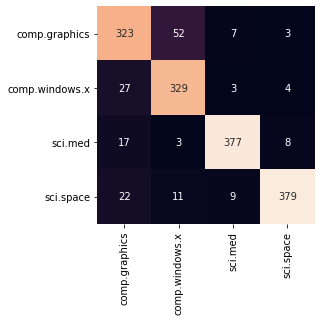

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib as plt
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)


In [39]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

predict_category('determining the screen resolution')

'comp.graphics'

In [41]:
predict_category('the moon is far far away')

'sci.space'